In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *
LetsPlot.setup_html(no_js=True)
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [2]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [3]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1,1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.58,1.69,1.66,1.39,1.26,1.14,1.10,1.12,1.19,1.20,1.58,1.18,1.34,1.36,1.56,1.44,1.12,1.32
141,2021,1.25,0.95,1.20,1.12,1.04,1.20,1.07,1.02,1.04,1.29,1.29,1.16,1.14,1.14,1.13,1.12,1.10,1.21
142,2022,1.24,1.16,1.41,1.08,1.02,1.12,1.06,1.16,1.14,1.31,1.09,1.06,1.15,1.16,1.19,1.17,1.11,1.18
143,2023,1.29,1.29,1.63,1.01,1.12,1.19,1.44,1.57,1.67,1.88,1.97,1.85,1.49,1.43,1.21,1.26,1.40,1.84


In [4]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1,1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [5]:
df.info()
na_values="***"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB


In [6]:
df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [7]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.58,1.69,1.66,1.39,1.26,1.14,1.10,1.12,1.19,1.20,1.58,1.18,1.34,1.36,1.56,1.44,1.12,1.32
2021,1.25,0.95,1.20,1.12,1.04,1.20,1.07,1.02,1.04,1.29,1.29,1.16,1.14,1.14,1.13,1.12,1.10,1.21
2022,1.24,1.16,1.41,1.08,1.02,1.12,1.06,1.16,1.14,1.31,1.09,1.06,1.15,1.16,1.19,1.17,1.11,1.18
2023,1.29,1.29,1.63,1.01,1.12,1.19,1.44,1.57,1.67,1.88,1.97,1.85,1.49,1.43,1.21,1.26,1.40,1.84
2024,1.66,1.93,1.77,1.79,1.44,1.54,1.42,1.42,1.57,NaN,NaN,NaN,NaN,NaN,1.81,1.67,1.46,NaN


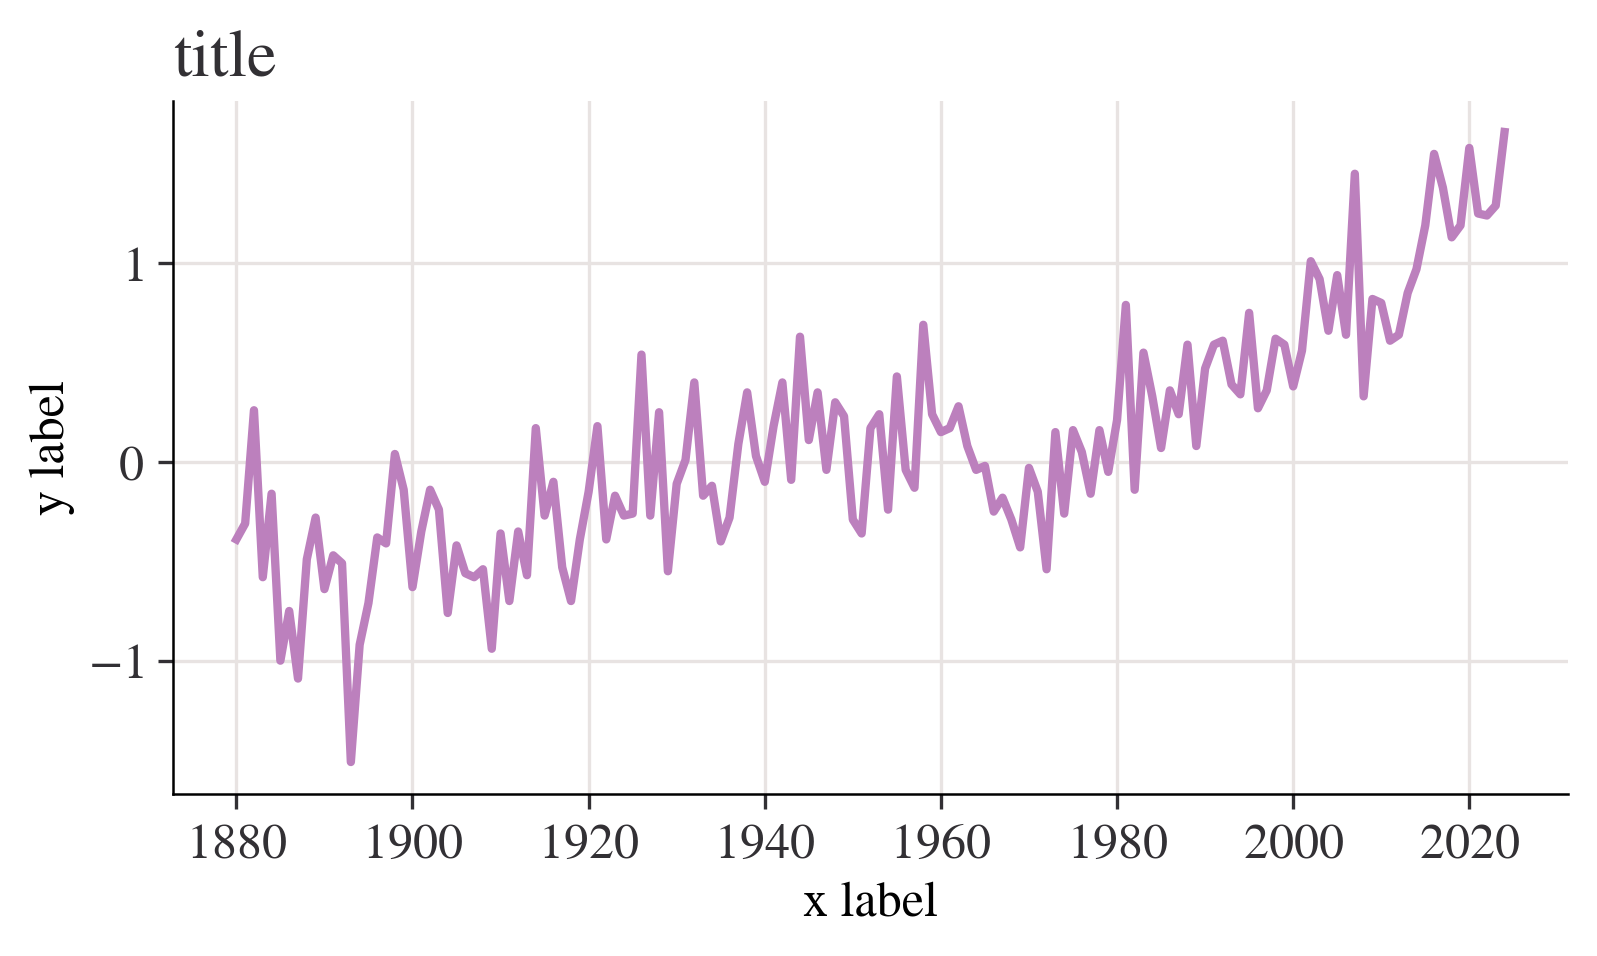

In [8]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

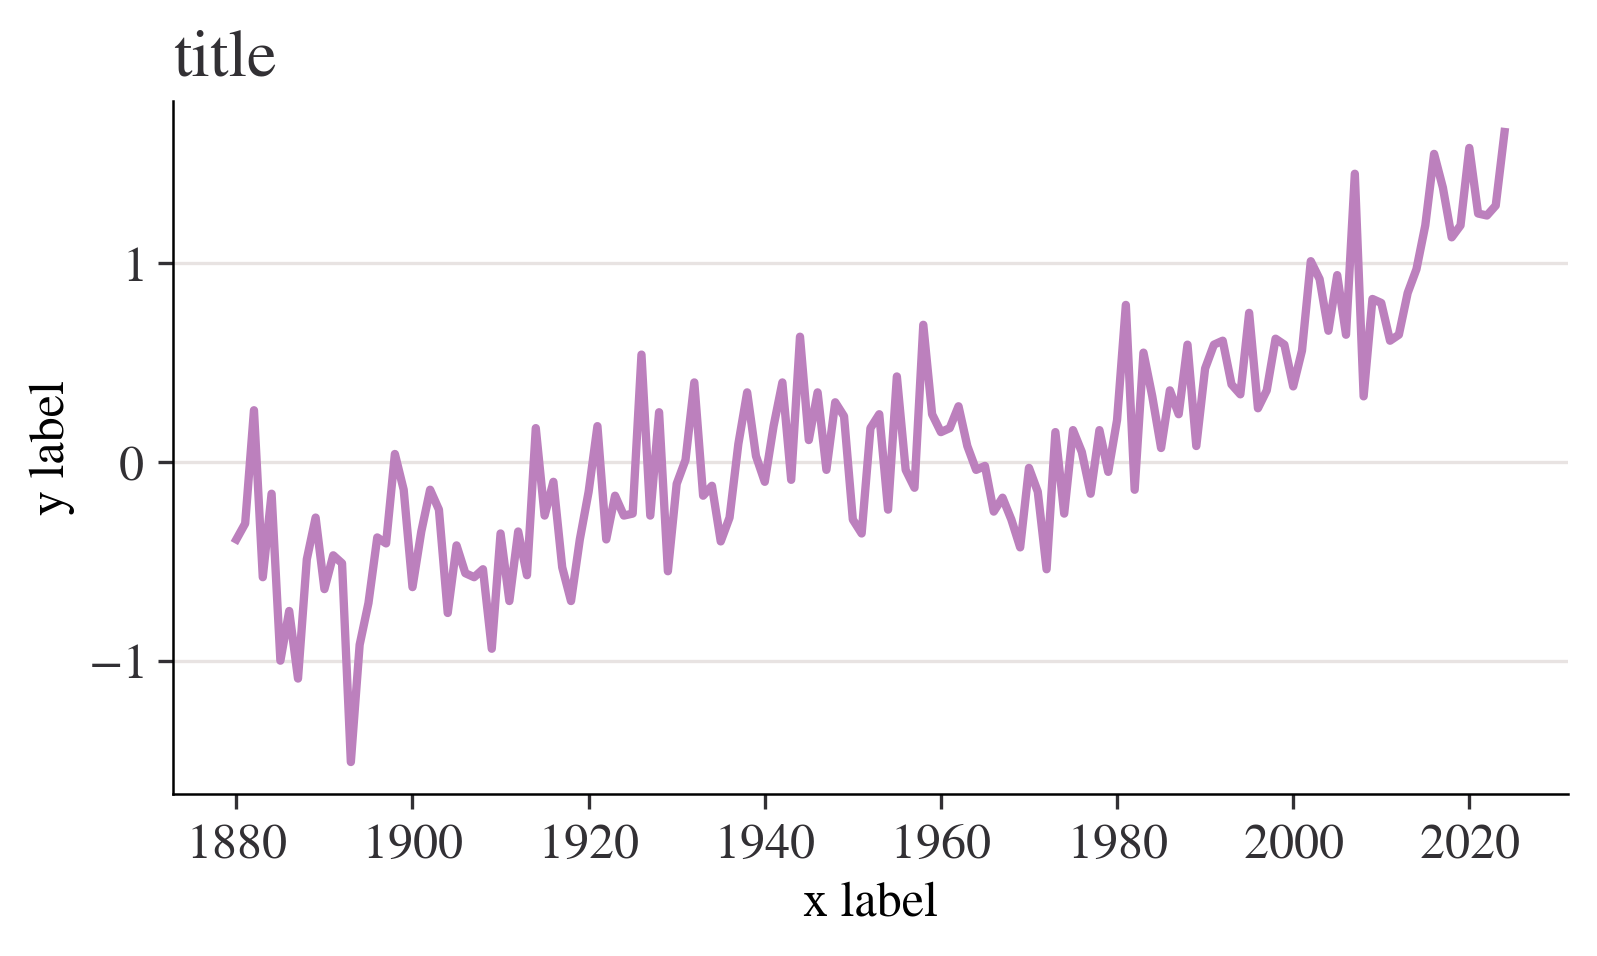

In [9]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

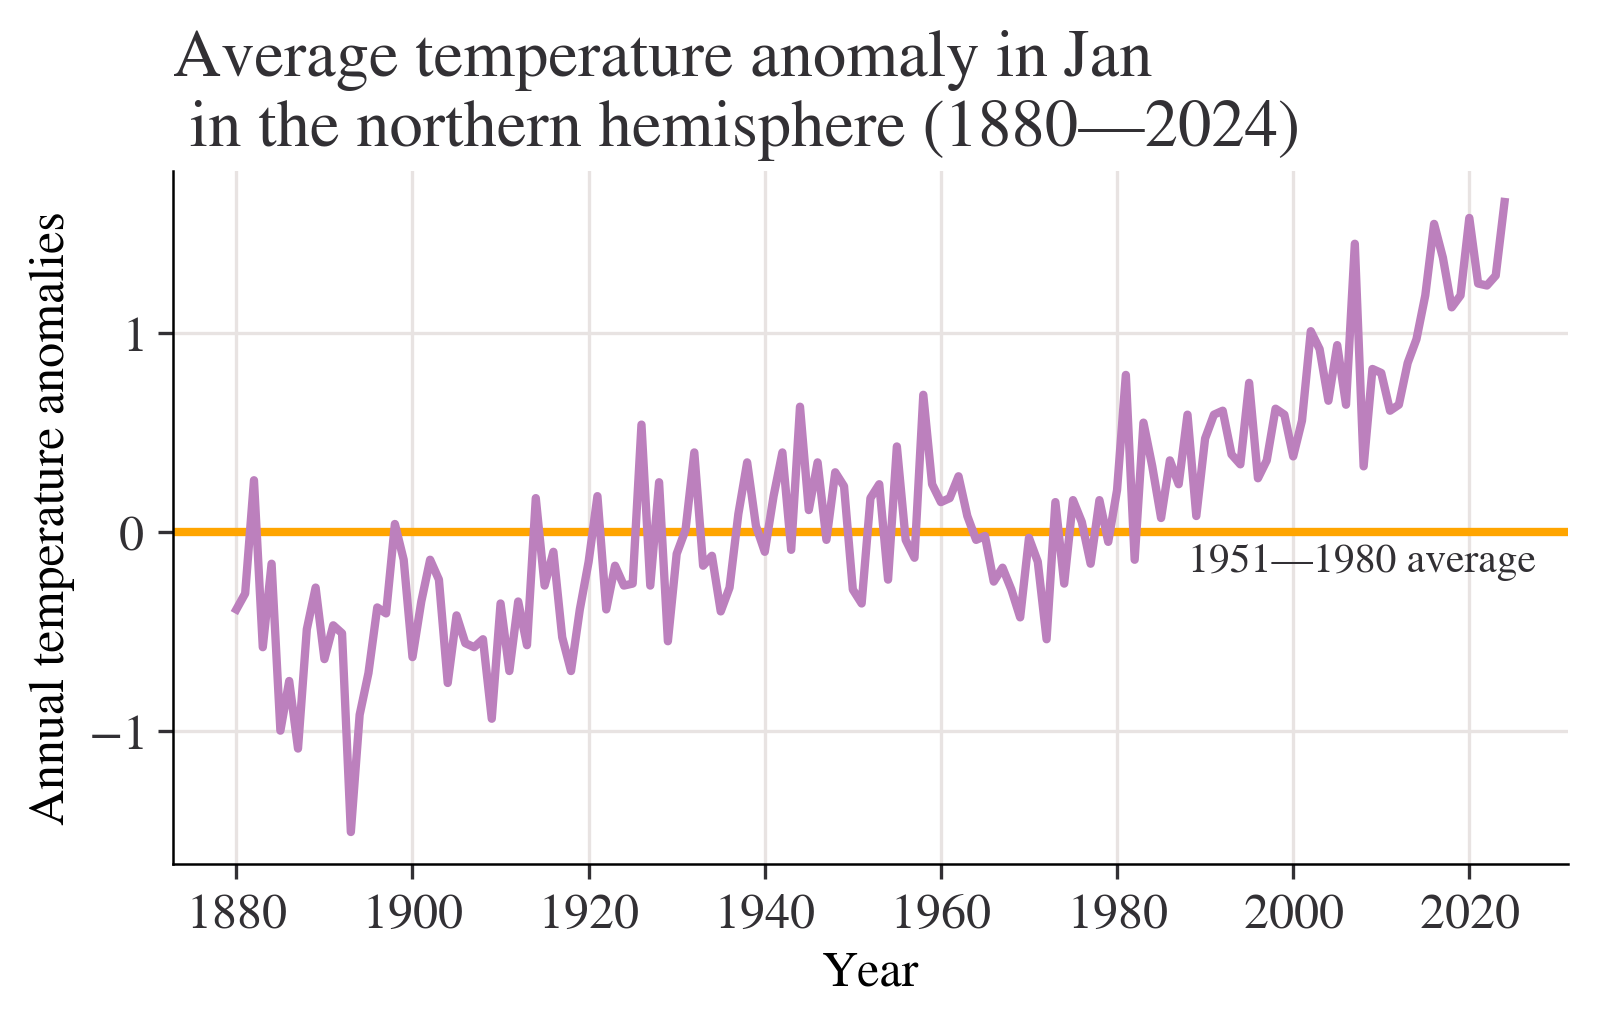

In [10]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

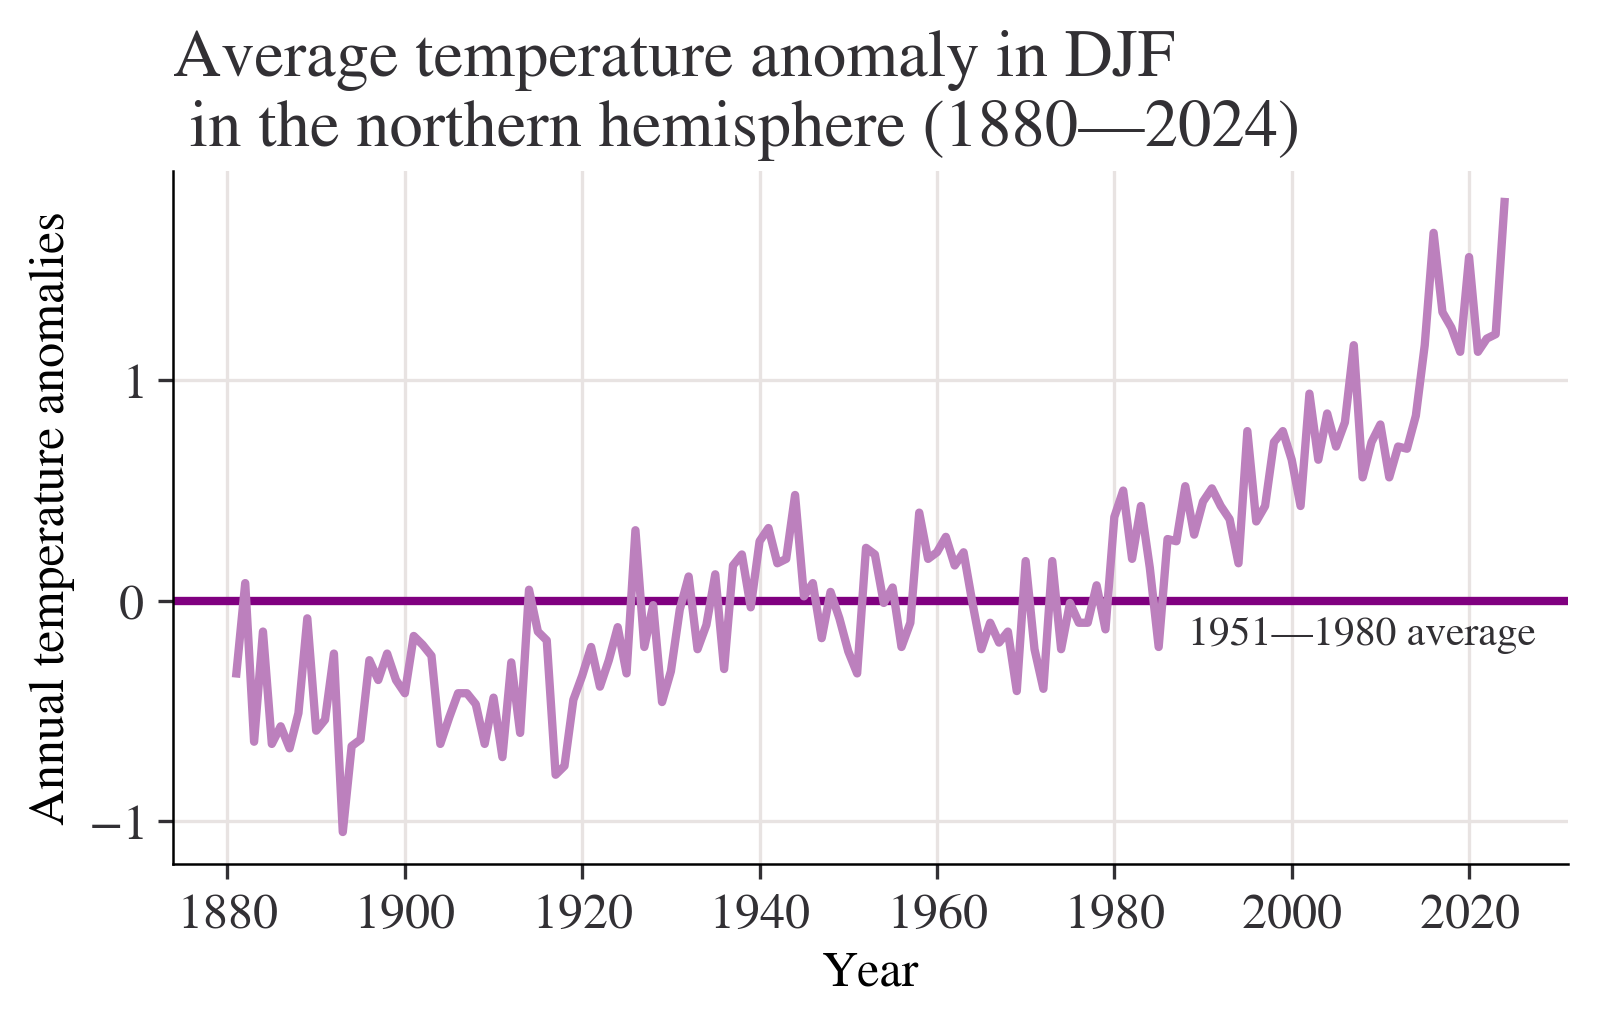

In [15]:
season = "DJF"
fig, ax = plt.subplots()
ax.axhline(0, color="purple")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[season].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {season} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

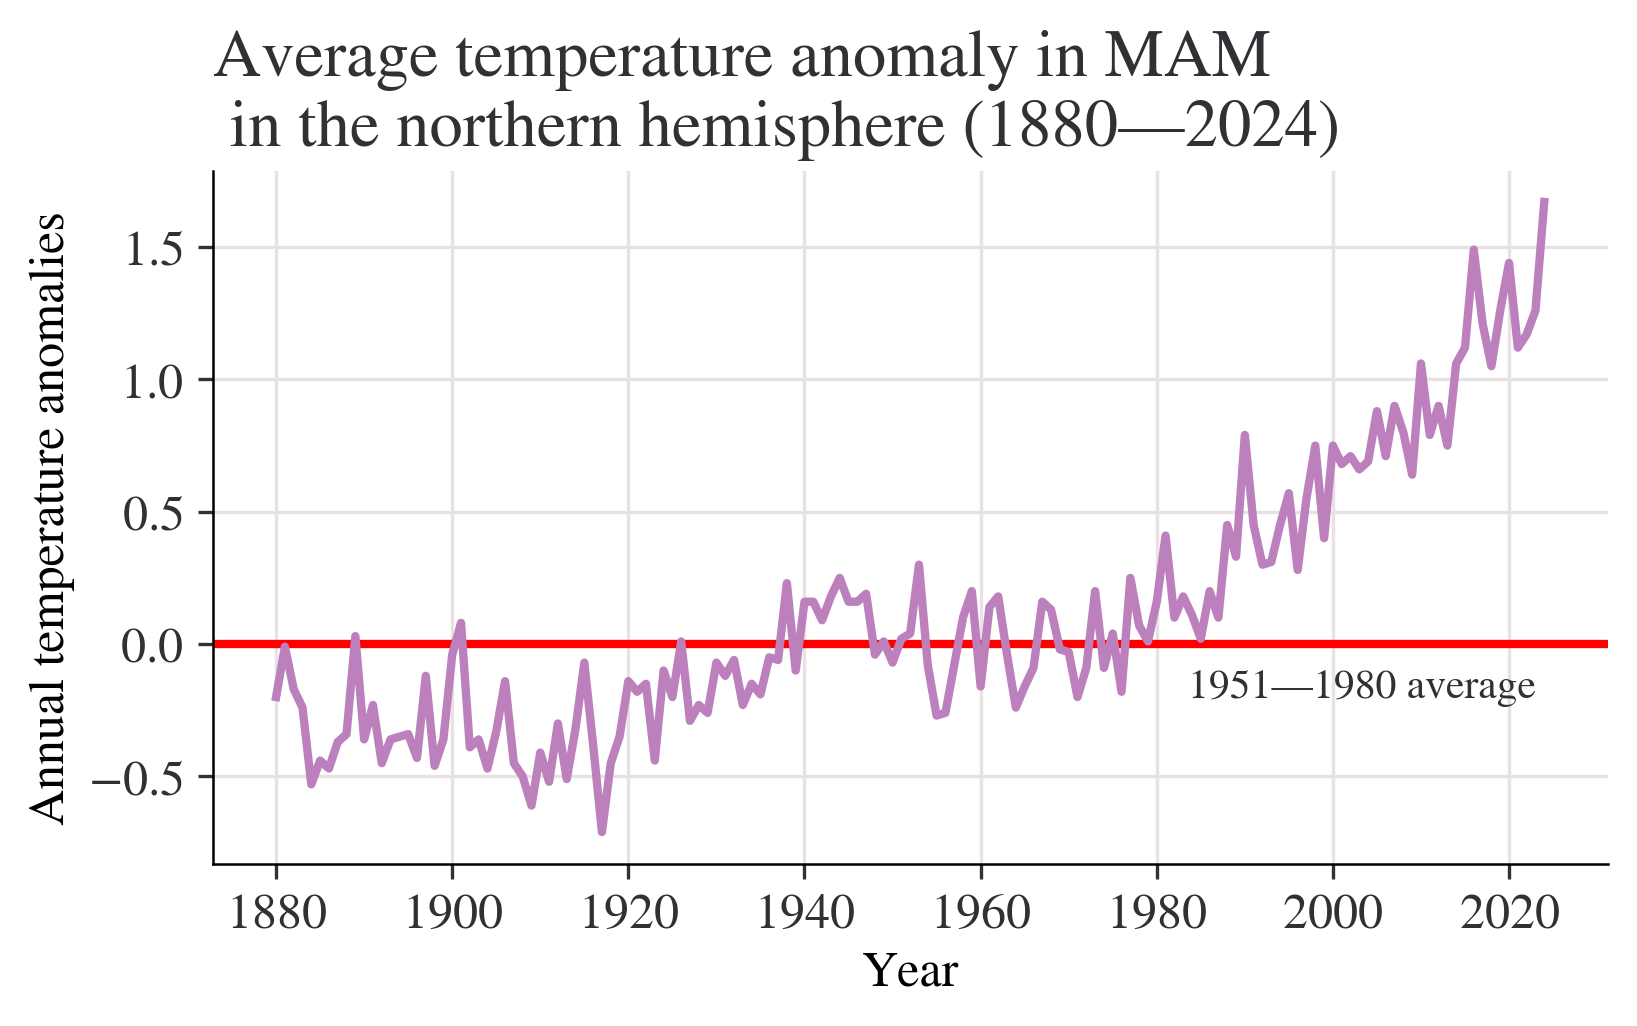

In [16]:
season = "MAM"
fig, ax = plt.subplots()
ax.axhline(0, color="red")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[season].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {season} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

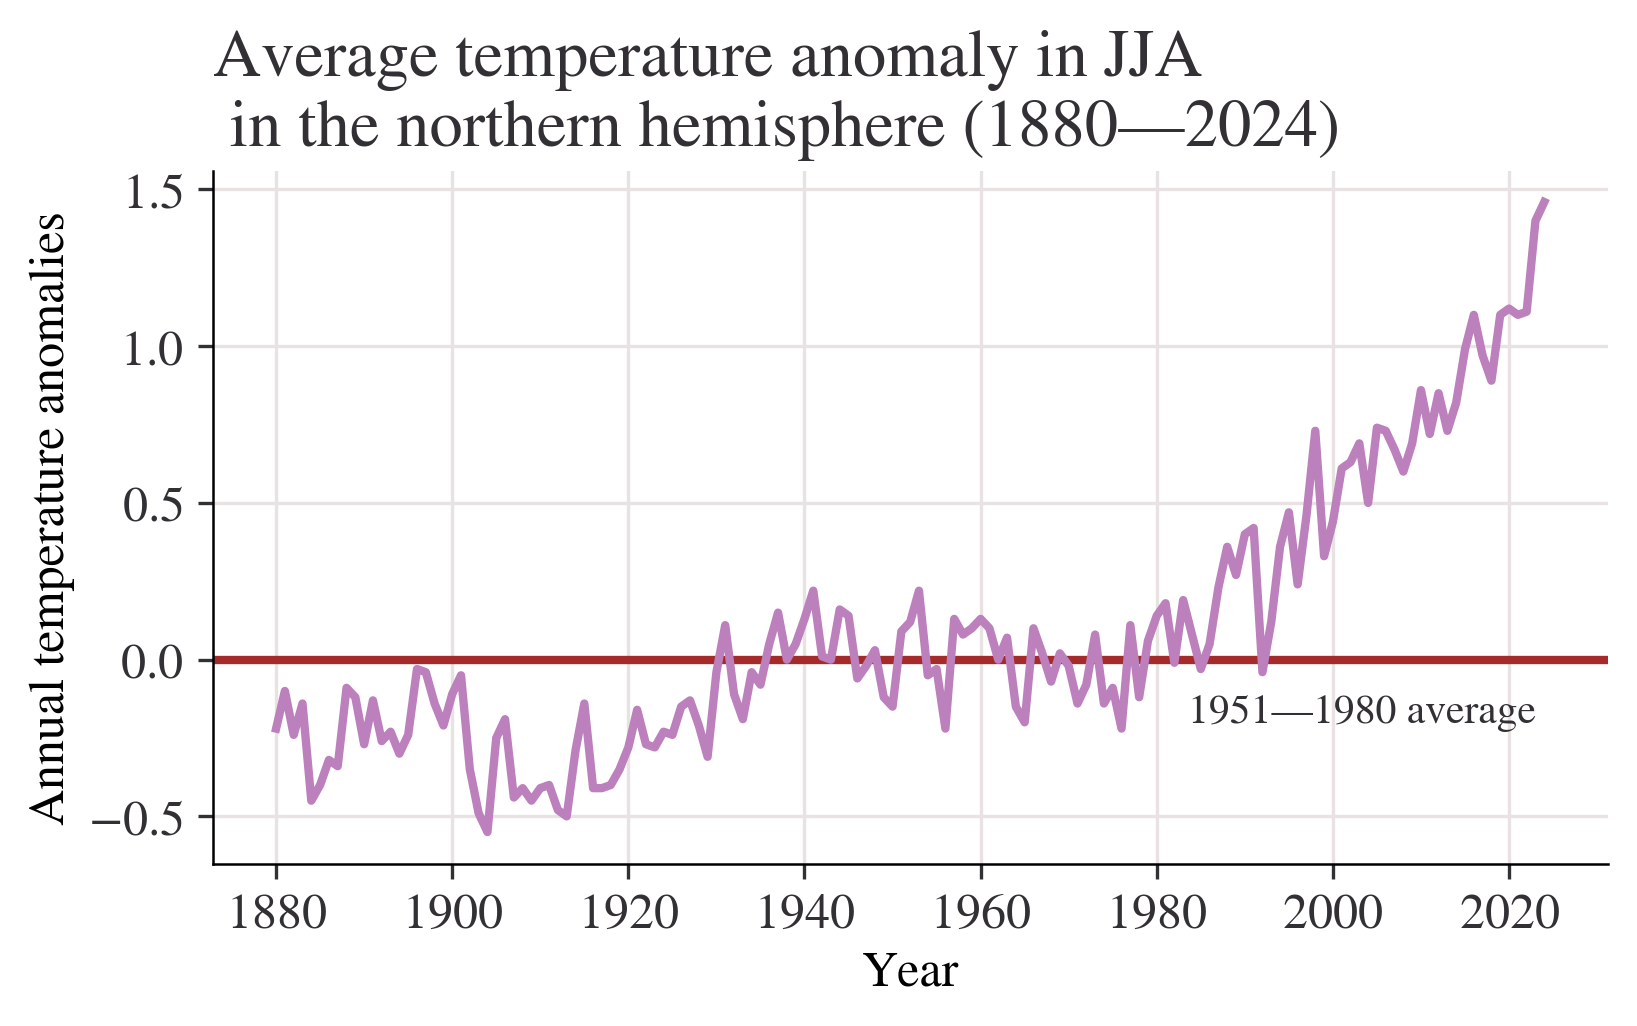

In [17]:
season = "JJA"
fig, ax = plt.subplots()
ax.axhline(0, color="brown")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[season].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {season} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

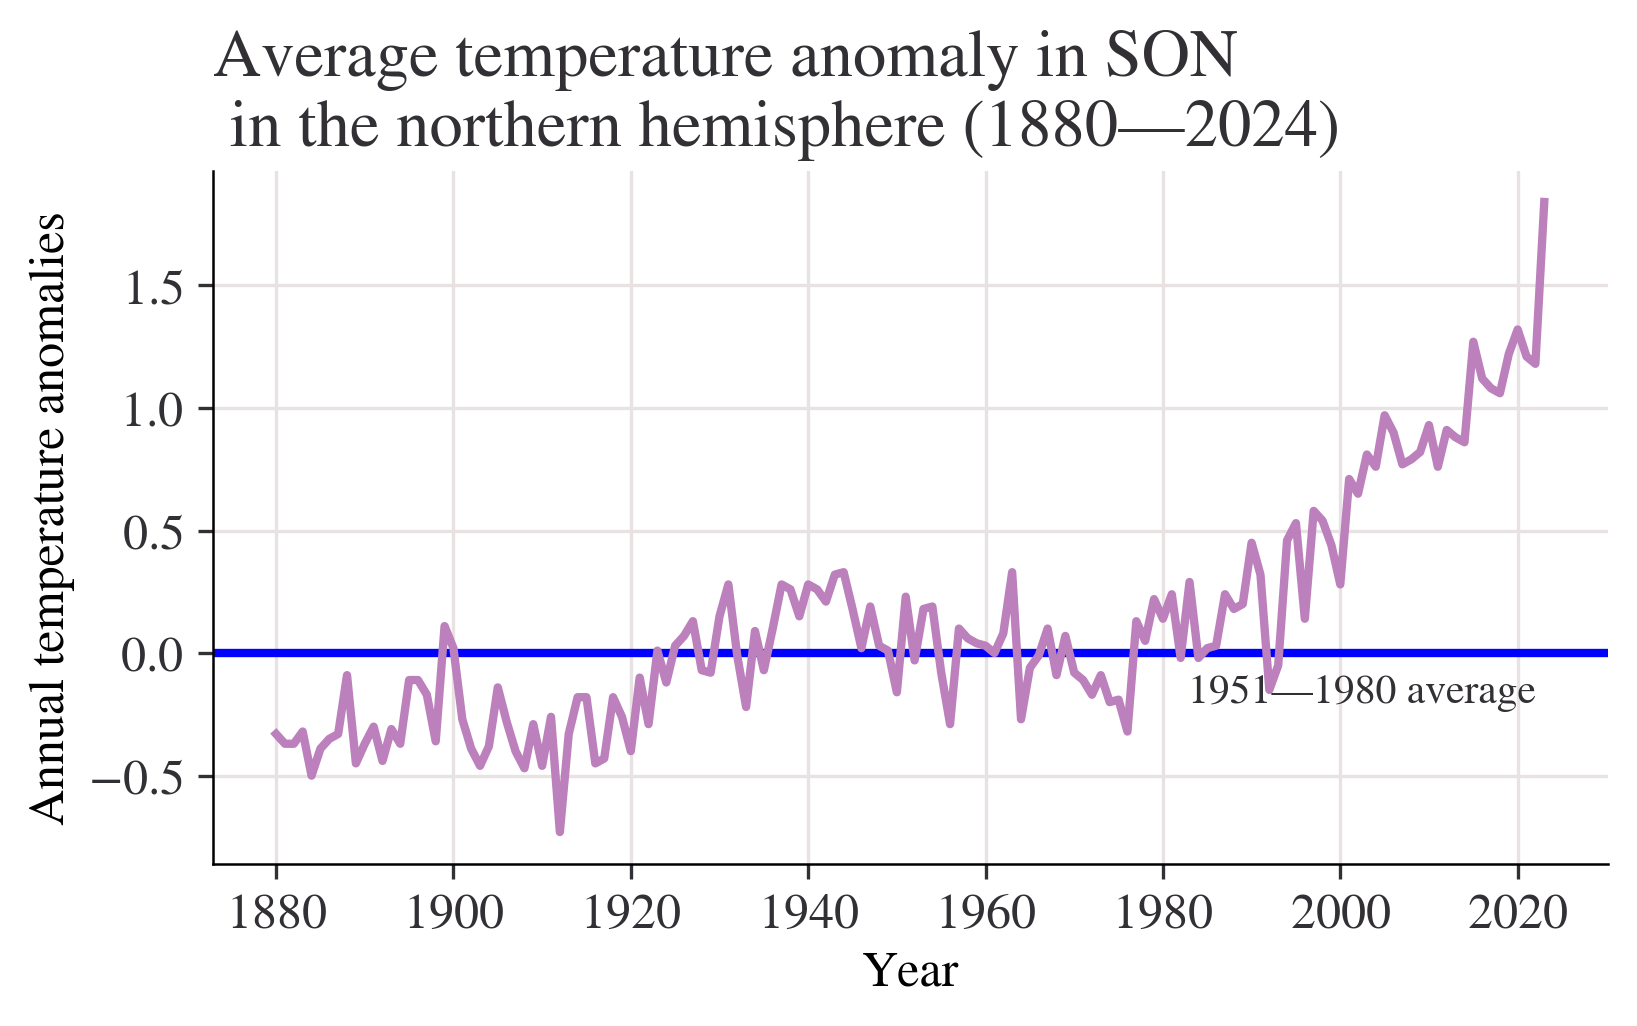

In [18]:
season = "SON"
fig, ax = plt.subplots()
ax.axhline(0, color="blue")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[season].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {season} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

Question:What do your charts from Questions 2 to 4(a) suggest about the relationship between temperature and time?
answer:Chart from question 2 shows that most of temperature anomalies are between -1 - 1,the year with the lowest temperature anomaly is between 1880-1900,the highest is in 2020.Although the data is floating up or down,the overall trend is slowly upward.
We can get a more clearly Chart from question 3 with titles of x label and y label.Besides,a horizontal line is added to make the chart easier to read.We can easily see how these statistics float with the average line marked.
Chart from question 4(a) shows that the overall trend is slowly upward.Data from 1880 to 2000 is rising slowly,but we can see that after 2000,(2000-2020) the chart shows a trend which is soaring dramatically without obvious decrease.

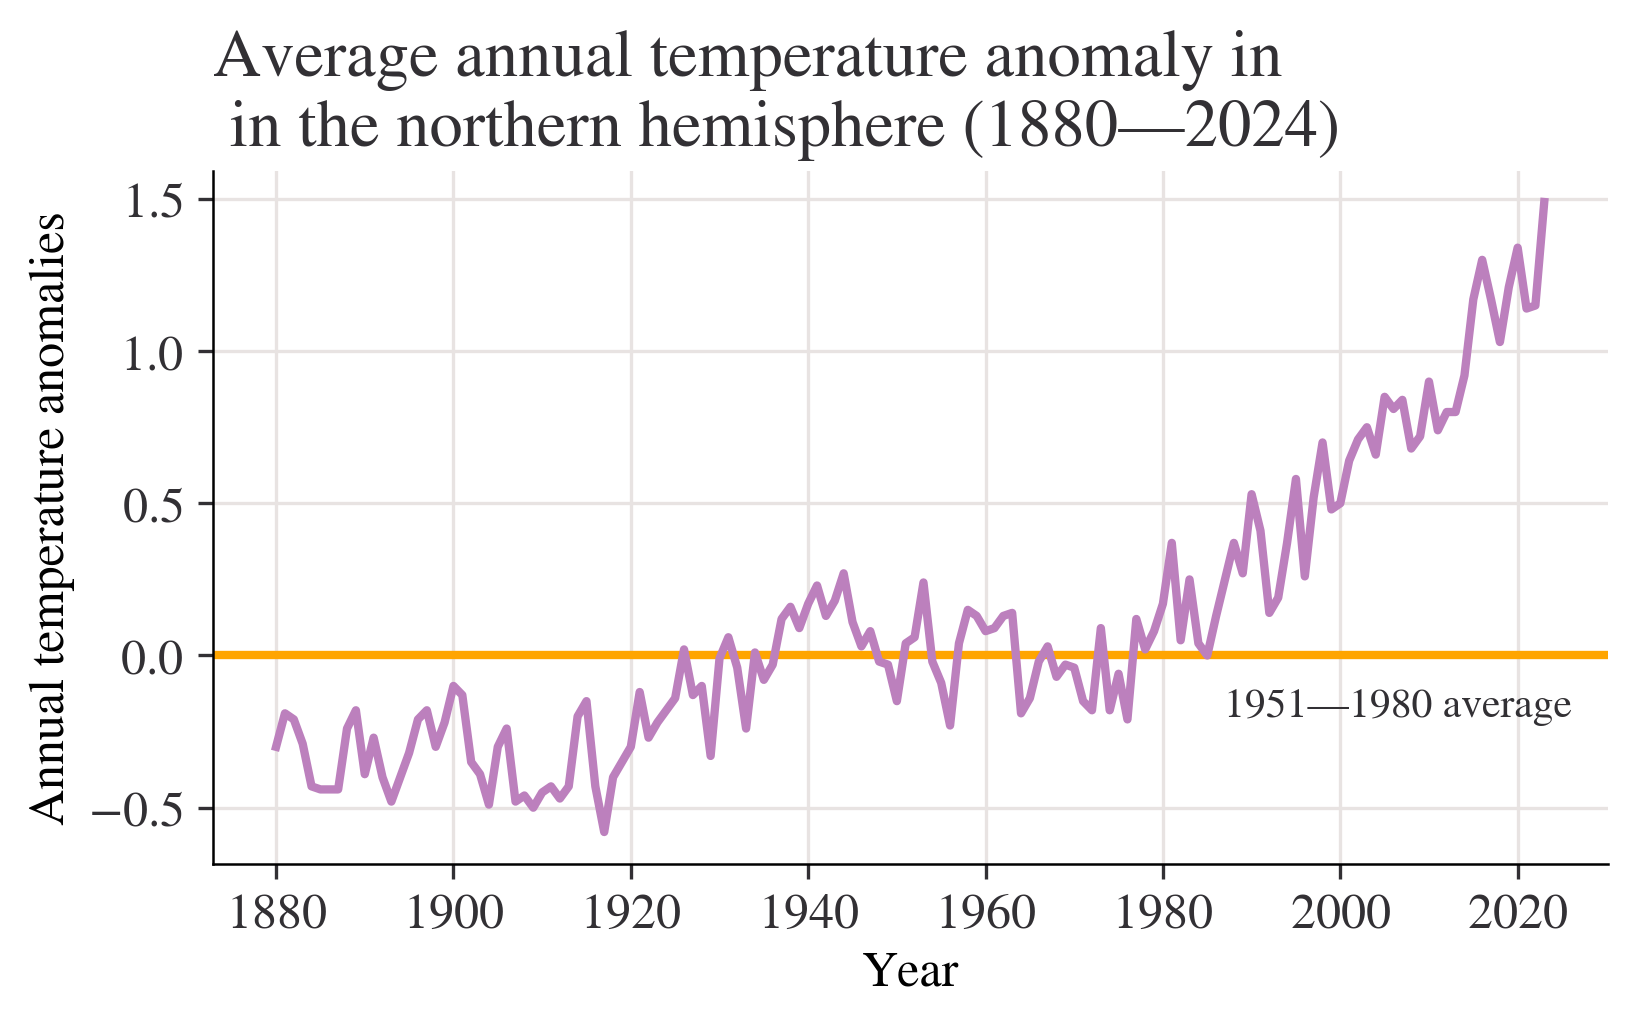

In [19]:
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

Question of 6(a):Discuss the similarities and differences between the charts.
answer of 6(a):the variables of horizontal axes are both years,the variables of vertical axes are both temperatures,but the specific statistics are different,the gaps between two numbers are different,too.The lines are not the same.The chart from question 4 shows a slowly rising trend.However,the chart from Figure 1.5 shows no obvious rising.
Question of 6(b):Looking at the behaviour of temperature over time from 1000 to 1900 in Figure 1.4, are the observed patterns in your chart unusual?
answer of 6(b):I thought the question may be wrong?It should be Figure 1.5? I will answer the question based on Figure 1.5.
These data fluctuate from -0.6 - 0 from 1000 to 1900.The overall trend are basically flat without sharp ascent or descent.It may not be unusual.
Question of 6(c):Based on your answers to Questions 4 and 5, do you think the government should be concerned about climate change?
answer of 6(c):I think the government should be concerned about climate change with no doubt.The statistics from Questions 4 and 5 shows the rising temperature these years.We can even see an obvious sharp rise after 2020,which shows the temperature of North Hemisphere is higer and higher because of the global warming,I think.The problem of the environment should be noticed and stressed.

In [20]:
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [21]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.26
1881  Jun   -0.34
      Jul    0.09
dtype: float64

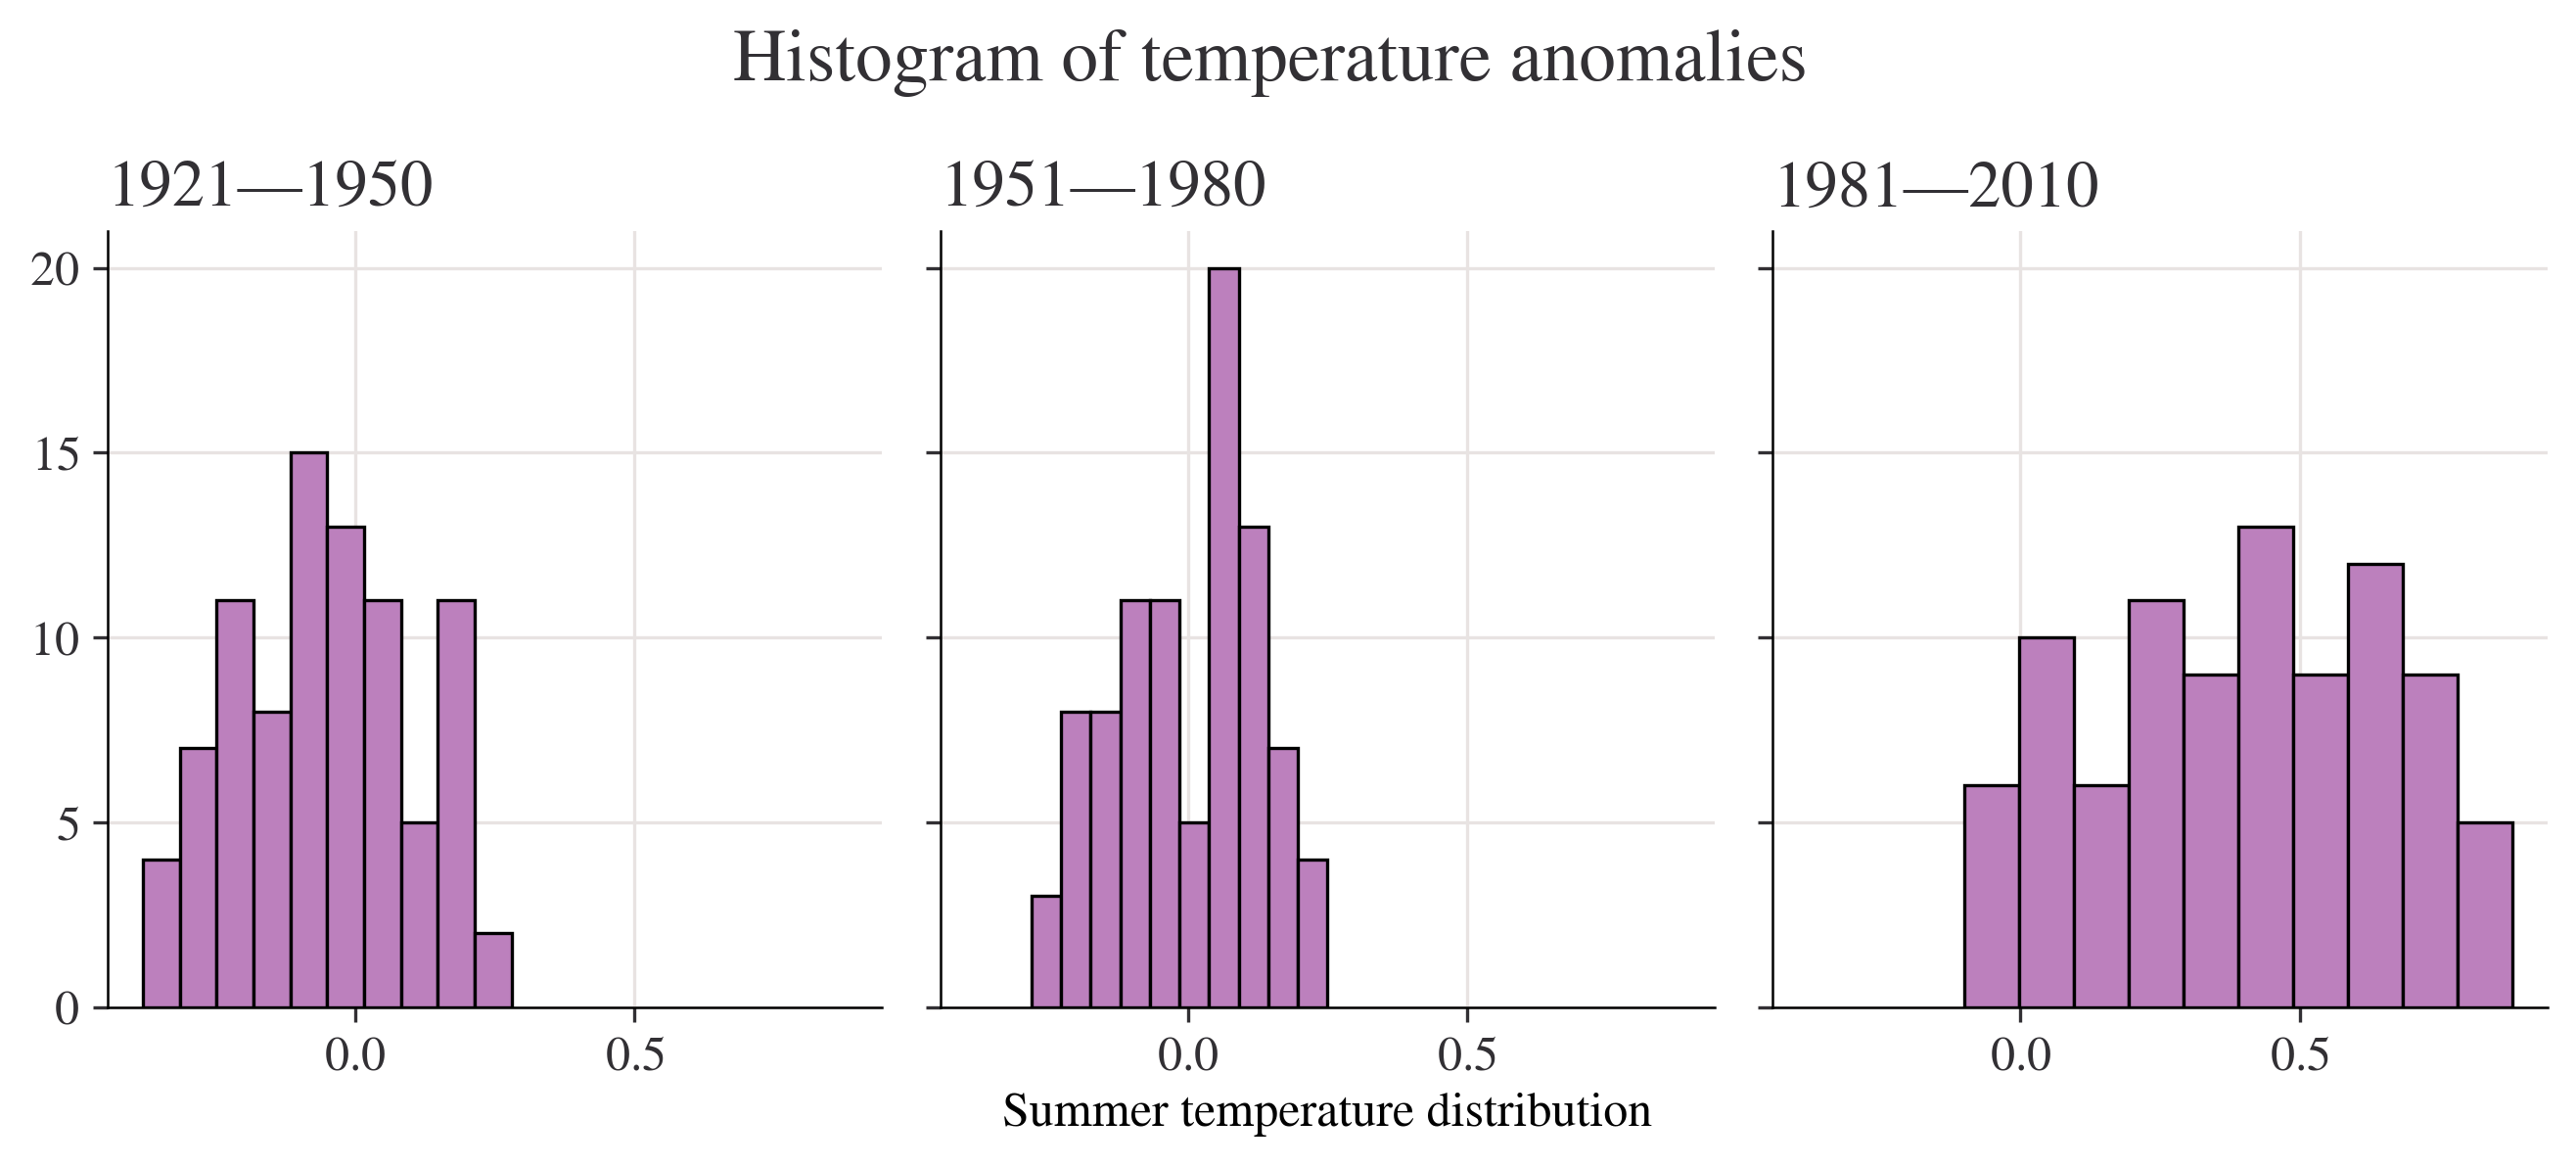

In [22]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

Question of 1.4 2(b):Using your charts, describe the similarities and differences (if any) between the distributions of temperature anomalies in 1951–1980 and 1981–2010.
answer of 1.4 2(b):most of the count of the number of anomalies that fall in the interval of these two charts are between 0-15.The bin width is also different.Bins of 1951-1980 differs from -0.3 - 0.25.However,Bins of 1981-2010 differs from -0.1 - 0.9.The most frequently encountered temperature interval of 1951-1980 is 20,which is far higher than that of 1981-2010.

In [23]:
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.19
3,1951,Apr,0.07
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.09
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.20


In [24]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


Question of 1.5 4:Does your answer suggest that we are experiencing hotter weather more frequently in this timeframe?
Answer of 1.5 4:According to'In decile terms, temperatures in the 1st to 3rd deciles are ‘cold’ and temperatures in the 7th to 10th deciles or above are ‘hot’',obviously,we are experiencing hotter weather more frequently in this timeframe.

In [25]:
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.79
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [26]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%


In [27]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [28]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
443,1991,DJF,0.51,1981—2010
444,1991,MAM,0.45,1981—2010
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.43,1981—2010
448,1992,MAM,0.30,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010


In [29]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\admin\AppData\Local\Temp\ipykernel_22272\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\admin\AppData\Local\Temp\ipykernel_22272\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x000001935BC7A660> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\admin\AppData\Local\Temp\ipykernel_22272\1563140002.py:1: FutureWarning: The provided callable <function var at 0x000001935BC7A8E0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided call

mean       var
Season Period                       
DJF    1921—1950 -0.027931  0.057703
       1951—1980 -0.003333  0.050375
       1981—2010  0.522000  0.078644
JJA    1921—1950 -0.054483  0.021611
       1951—1980  0.001333  0.014640
       1981—2010  0.399000  0.067775
MAM    1921—1950 -0.041724  0.031136
       1951—1980  0.000333  0.025272
       1981—2010  0.507667  0.075812
SON    1921—1950  0.081379  0.027798
       1951—1980 -0.001333  0.026384
       1981—2010  0.427000  0.110739

In [30]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

Question of 1.6 5(b):For each season, compare the variances in different periods, and explain whether or not temperature appears to be more variable in later periods
answer of 1.6 5(b):We can see that variances in different periods differs.But the difference between 1921-1950 and 1950-1980 is very small.However,the variance in 1981-2010 is upward sharply.So we can say temperature appears to be more variable in later periods
Question of 1.7 6:whether temperature appears to be more variable over time. Would you advise the government to spend more money on mitigating the effects of extreme weather events?
Answer of 1.7 6:Of course temperature appears to be more variable over time.,especially in 1981-2010,temperature is rising obviously,which shows the environment is getting worse and worse.I strongly recommend the government to spend more money on mitigating the effects of extreme weather events,otherwise,we human beings have to face the bad result.

In [31]:
df_co2 = pd.read_csv("data2.csv")
df_co2.head()

,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


In [32]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [34]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [35]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [36]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.000000,0.914371
Trend,0.914371,1.000000


In [37]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [34]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

Question of part 1.3 1:whether or not you think this data is a reliable representation of the global atmosphere
answer of part 1.3 1:Considering that Dave Keeling, who was the first to make accurate measurements of CO2 in the atmosphere, chose the site high up on the slopes of the Mauna Loa volcano,air there must be different from other regions.I don't think it is a reliable representation of the global atmosphere.
Question of part 1.3 2:In your own words, explain the difference between these two measures of CO2 levels.
answer of part 1.3 2:The variable interpolated is always a little bit higher than the variable trend.
Question of part 1.3 3:What does this chart suggest about the relationship between CO2 and time?
answer of part 1.3 3:There is a strong positive association between the two variables-higher temperature anomalies are associated with higher CO2 levels.
Question of part 1.3 4:Calculate and interpret the (Pearson) correlation coefficient between these two variables;discuss the shortcomings of using this coefficient to summarize the relationship between variables
answer of part 1.3 4:In this case, the correlation coefficient tells us that an upward-sloping straight line is quite a good fit to the date (as seen on the scatterplot). There is a strong positive association between the two variables (higher temperature anomalies are associated with higher CO2 levels).

One limitation of this correlation measure is that it only tells us about the strength of the upward- or downward-sloping linear relationship between two variables; in other words, how closely the scatterplot aligns along an upward- or downward-sloping straight line. The correlation coefficient cannot tell us if the two variables have a different kind of relationship (such as that represented by a wavy line).